In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sleephealth = pd.read_csv('/Users/fatmagulgok/Desktop/spark/portfolio/datasets/sleephealth.csv')

In [3]:
sleephealth.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleephealth.shape

(374, 13)

In [5]:
sleephealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
sleephealth.iloc[:,1:].describe().round(1) # minus the person ID

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.0,374.0,374.0,374.0,374.0,374.0,374.0
mean,42.2,7.1,7.3,59.2,5.4,70.2,6816.8
std,8.7,0.8,1.2,20.8,1.8,4.1,1617.9
min,27.0,5.8,4.0,30.0,3.0,65.0,3000.0
25%,35.2,6.4,6.0,45.0,4.0,68.0,5600.0
50%,43.0,7.2,7.0,60.0,5.0,70.0,7000.0
75%,50.0,7.8,8.0,75.0,7.0,72.0,8000.0
max,59.0,8.5,9.0,90.0,8.0,86.0,10000.0


In [7]:
sleephealth.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [8]:
sleephealth['Sleep Disorder'].fillna('No disorder', inplace=True)
sleephealth.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
sleephealth.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [10]:
sleepnum = sleephealth.drop(['Person ID', 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure','Sleep Disorder'], axis = 1)
sleepnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep Duration           374 non-null    float64
 2   Quality of Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   Heart Rate               374 non-null    int64  
 6   Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 20.6 KB


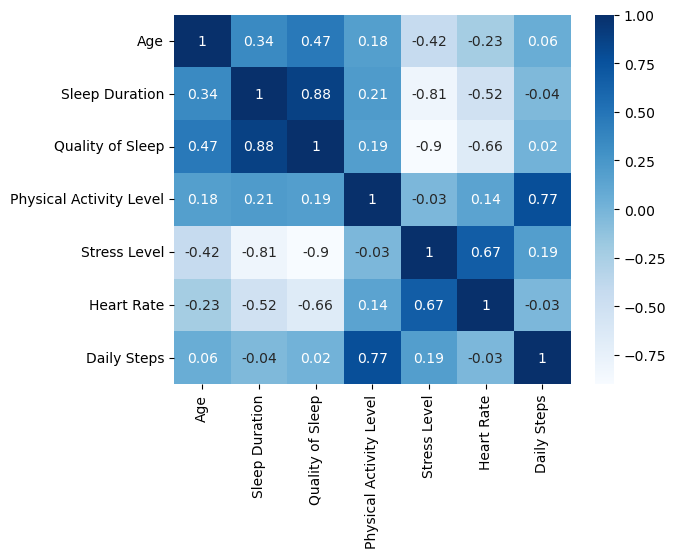

In [11]:
sns.heatmap(sleepnum.corr().round(2), annot = True, cmap = 'Blues');

In [12]:
qualsteps = sleephealth.groupby('Quality of Sleep').agg(Mean_steps = ('Daily Steps', 'mean'), Mean_dur = ('Sleep Duration', 'mean')).reset_index()
display(qualsteps.corr().round(2))
qualsteps.round(1)

,Quality of Sleep,Mean_steps,Mean_dur
Quality of Sleep,1.00,0.71,0.95
Mean_steps,0.71,1.00,0.47
Mean_dur,0.95,0.47,1.00


,Quality of Sleep,Mean_steps,Mean_dur
0,4,3880.0,5.9
1,5,4257.1,6.5
2,6,7092.4,6.2
3,7,6659.7,7.1
4,8,7462.4,7.4
5,9,6047.9,8.2


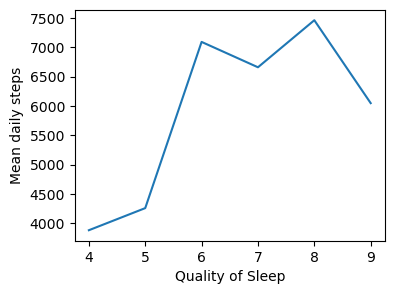

In [13]:
qualsteps.plot(kind = 'line', x = 'Quality of Sleep', y = 'Mean_steps', figsize=(4,3), ylabel='Mean daily steps', legend=False);

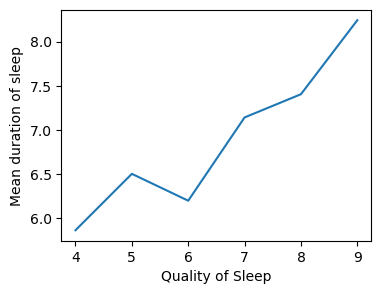

In [14]:
qualsteps.plot(kind = 'line', x = 'Quality of Sleep', y = 'Mean_dur', figsize=(4,3), ylabel='Mean duration of sleep', legend=False);

In [15]:
occupstress = sleephealth.groupby('Occupation')[['Stress Level']].value_counts().reset_index()
occupstress.head(8)

,Occupation,Stress Level,count
0,Accountant,4,26
1,Accountant,7,6
2,Accountant,6,3
3,Accountant,3,2
4,Doctor,8,33
5,Doctor,6,32
6,Doctor,3,4
7,Doctor,5,2


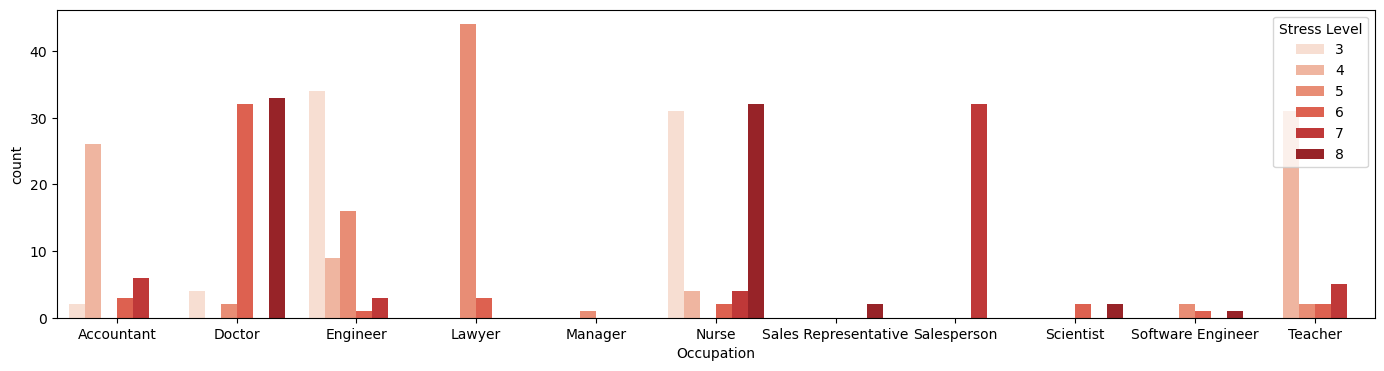

In [16]:
plt.subplots(figsize = (17,4))
ax = sns.barplot(data = occupstress, x = 'Occupation', y = 'count', hue = 'Stress Level', palette = 'Reds')

Looking at the bar chart we can see that the dataset doesn't seem to contain very many managers or sales representatives. Lets see how many observations of each profession actually appear in the dataset.

In [17]:
sleephealth[['Occupation']].value_counts()

Occupation          
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

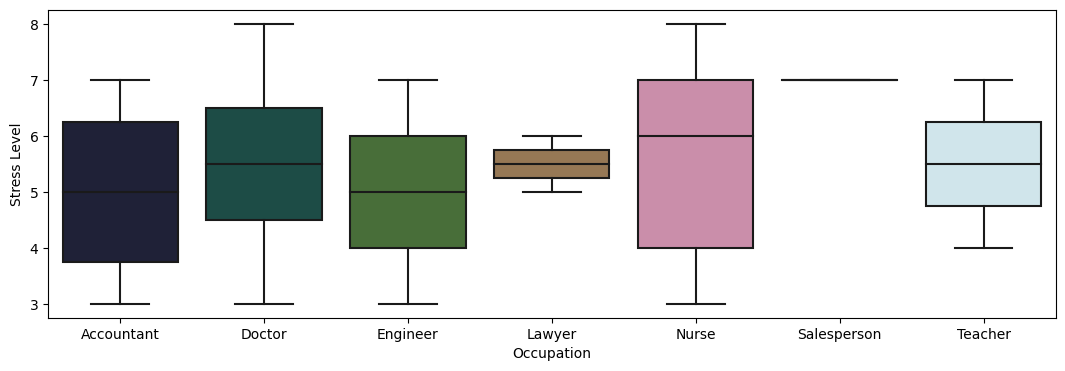

In [18]:
plt.subplots(figsize = (13,4))
ax = sns.boxplot(data = occupstress[~occupstress.Occupation.isin(['Scientist', 'Software Engineer', 'Sales Representative', 'Manager'])], x = 'Occupation', y = 'Stress Level', palette = 'cubehelix')

Investigate the 'salesperson' occupation. Looks like all 32 salespeople in the dataset have the same exact stress level. 

In [19]:
occupstress[occupstress.Occupation == 'Lawyer']

,Occupation,Stress Level,count
13,Lawyer,5,44
14,Lawyer,6,3


#### Try a simple linear model using only the numerical variables

Split the data into explanatory variables and response

In [43]:
#X_data = sleephealth.loc[:, ~sleephealth.columns.isin(['Quality of Sleep','Sleep Duration', 'Person ID'])]
X_data = sleepnum.loc[:, ~sleepnum.columns.isin(['Quality of Sleep','Sleep Duration'])]
y_data = sleephealth.loc[:, sleephealth.columns.isin(['Quality of Sleep','Sleep Duration'])]
X_data.head()

,Age,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,42,6,77,4200
1,28,60,8,75,10000
2,28,60,8,75,10000
3,28,30,8,85,3000
4,28,30,8,85,3000


In [44]:
from sklearn.model_selection import train_test_split
X_data =  X_data.to_numpy()
y_data =  y_data.loc[:,'Sleep Duration'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.7, random_state = 42)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train)
                                            
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
b = linear_regr.coef_
b0 = linear_regr.intercept_
                                            
b, b0
print(f'Intercept: {b0.round(2)}')
print(f'Regression coefficients (slopes): {b.round(4)}')

Intercept: 9.34
Regression coefficients (slopes): [-0.    0.01 -0.34 -0.01 -0.  ]


Coefficient of determination for the simple model. Quite good however the categorical and binary variables must be considered too

In [57]:
linear_regr.score(X_data, y_data).round(3)

0.695

#### Models to include categorical variables

The initial simple model discounted non-numerical variables for ease, however there is no solid reason to exclude these at this point. 